<h1>CNN modeli za prepoznavanje šalica</h1>
<hr/>
<h2>Model Delta</h2>
<p>Testovi sa smanjenom kompleksnosti modela</p>
<p> Set slika je 700/100, dodavanje Dropot-a</p>

<p>Uvoženje potrebnih modula:</p>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt
import numpy as np


<p>Postavljanje direktorija sa trening i validacijskim slikama:</p>

In [3]:
# Postavi direktorije slika
train_dir = "../../Projekt_slike_128/Trening"
test_dir = "../../Projekt_slike_128/Validacija"

<p>Odabir broja epoha i veličine batch-eva:</p>

In [11]:
# Odredi broj epoha i veličinu batcheva
num_of_epochs = input("Number of epochs:")
num_of_epochs = int(num_of_epochs)
size_of_batch = input("Batch size:")
size_of_batch = int(size_of_batch)

Number of epochs: 100
Batch size: 32


<p>Generiranje podataka:</p>

In [5]:
# Generatori podataka
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


<p>Prikaz slika iz svake klase: </p>

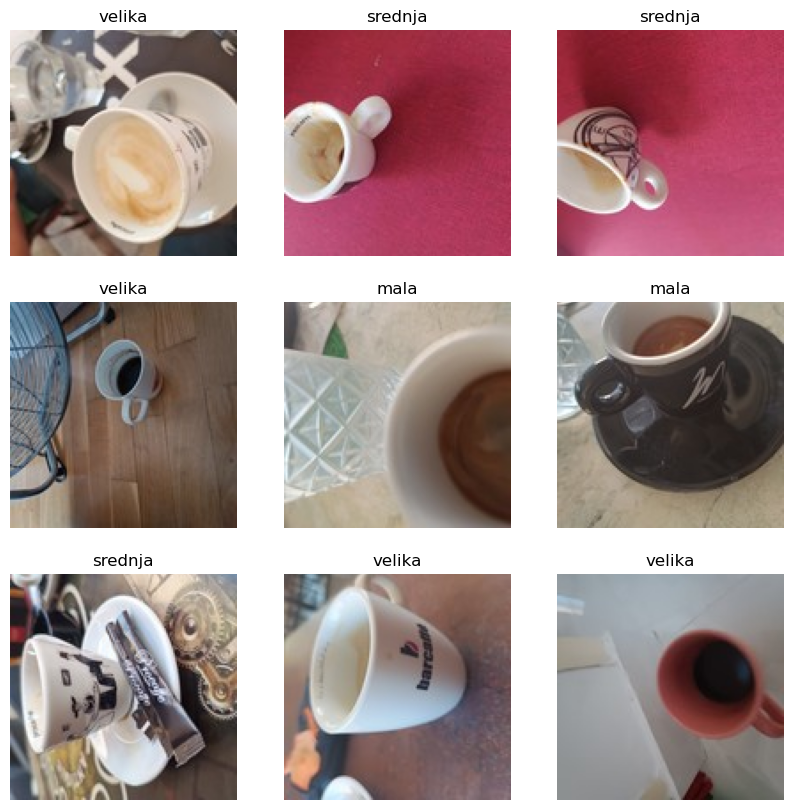

In [6]:
# Primjeri slika
def display_sample_images(generator):
    x, y = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        
        if (np.argmax(y[i])==0):
            plt.title("mala")
        if (np.argmax(y[i])==1):
            plt.title("srednja")
        if (np.argmax(y[i])==2):
            plt.title("velika")
        plt.axis("off")
    plt.show()


display_sample_images(train_generator)


<p>Jednostavnosti radi, veličine šalica nazvanje su mala, srednja i velika.
Srednja šalica je "velika šalica za crnu kavu", a velika šalica je "šalica za bijelu kavu".</p>

<hr/>
<p>Izgradnja osnovnog (pojednostavljenog!) CNN modela za prepoznavanje šalica:</p>

<h2>MOdel D.1</h2>
<p>dodavanje Dropouta, vrijednost 0.2 </p>


In [14]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 64</p>

In [15]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20


2024-08-15 07:40:11.490452: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 17s 409ms/step - loss: 1.6930 - accuracy: 0.4023 - val_loss: 1.1195 - val_accuracy: 0.3516
Epoch 2/20
32/32 [==============================] - 12s 377ms/step - loss: 0.8512 - accuracy: 0.6557 - val_loss: 1.4552 - val_accuracy: 0.4297
Epoch 3/20
32/32 [==============================] - 12s 378ms/step - loss: 0.7124 - accuracy: 0.7073 - val_loss: 1.4706 - val_accuracy: 0.3477
Epoch 4/20
32/32 [==============================] - 12s 377ms/step - loss: 0.6227 - accuracy: 0.7613 - val_loss: 1.7189 - val_accuracy: 0.3828
Epoch 5/20
32/32 [==============================] - 13s 398ms/step - loss: 0.5741 - accuracy: 0.7672 - val_loss: 1.8095 - val_accuracy: 0.3867
Epoch 6/20
32/32 [==============================] - 13s 387ms/step - loss: 0.5153 - accuracy: 0.7991 - val_loss: 1.9789 - val_accuracy: 0.3945
Epoch 7/20
32/32 [==============================] - 12s 379ms/step - loss: 0.4872 - accuracy: 0.8119 - val_loss: 2.2097 - val_accuracy: 0.3516
Epoch 8/20

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela D.1:</p>

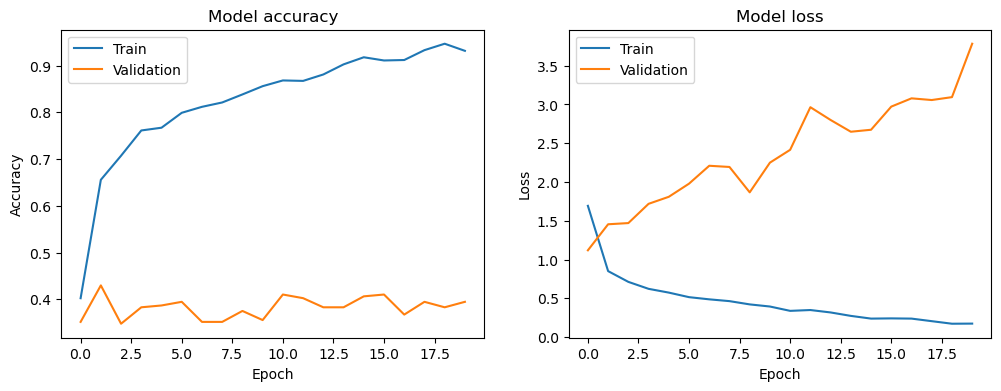

4/4 [==============================] - 1s 122ms/step - loss: 3.8493 - accuracy: 0.3633
Test accuracy: 0.36328125


In [16]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2>Model D.2</h2>

<p>Dropout podignut na 0.3</p>

In [17]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 64</p>

In [18]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20


2024-08-15 07:46:45.167526: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 16s 407ms/step - loss: 1.4402 - accuracy: 0.4391 - val_loss: 1.1776 - val_accuracy: 0.2734
Epoch 2/20
32/32 [==============================] - 12s 377ms/step - loss: 0.7853 - accuracy: 0.6768 - val_loss: 1.4589 - val_accuracy: 0.3477
Epoch 3/20
32/32 [==============================] - 12s 376ms/step - loss: 0.6767 - accuracy: 0.7245 - val_loss: 1.4148 - val_accuracy: 0.2305
Epoch 4/20
32/32 [==============================] - 12s 376ms/step - loss: 0.6039 - accuracy: 0.7559 - val_loss: 1.5237 - val_accuracy: 0.3320
Epoch 5/20
32/32 [==============================] - 13s 394ms/step - loss: 0.5334 - accuracy: 0.7859 - val_loss: 1.5026 - val_accuracy: 0.3555
Epoch 6/20
32/32 [==============================] - 12s 386ms/step - loss: 0.4777 - accuracy: 0.8158 - val_loss: 1.6467 - val_accuracy: 0.4102
Epoch 7/20
32/32 [==============================] - 12s 376ms/step - loss: 0.4286 - accuracy: 0.8315 - val_loss: 1.6829 - val_accuracy: 0.3516
Epoch 8/20

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela D.2:</p>

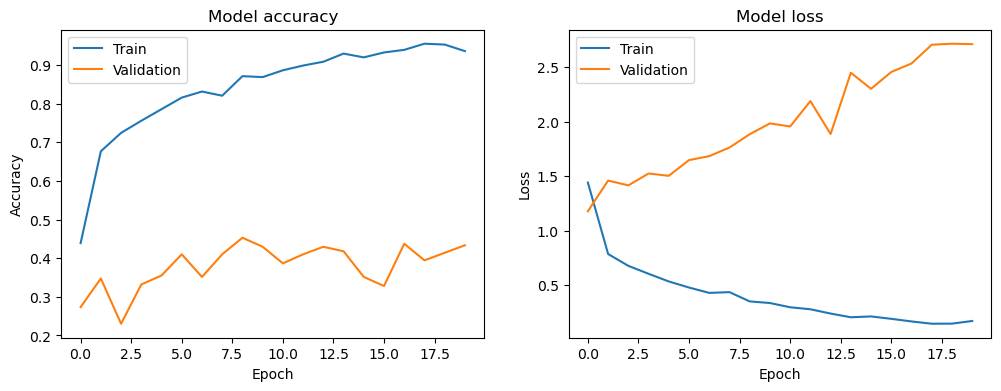

4/4 [==============================] - 1s 117ms/step - loss: 2.7876 - accuracy: 0.4141
Test accuracy: 0.4140625


In [19]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel D.3</h2>
<p>Dropout 0.4</p>

In [20]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 64</p>

In [22]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20


2024-08-15 07:54:47.302159: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 16s 406ms/step - loss: 1.8115 - accuracy: 0.4082 - val_loss: 1.0869 - val_accuracy: 0.2305
Epoch 2/20
32/32 [==============================] - 12s 361ms/step - loss: 0.9478 - accuracy: 0.5688 - val_loss: 1.1309 - val_accuracy: 0.4648
Epoch 3/20
32/32 [==============================] - 11s 353ms/step - loss: 0.8078 - accuracy: 0.6596 - val_loss: 1.2545 - val_accuracy: 0.3164
Epoch 4/20
32/32 [==============================] - 12s 370ms/step - loss: 0.7107 - accuracy: 0.7004 - val_loss: 1.3591 - val_accuracy: 0.4375
Epoch 5/20
32/32 [==============================] - 12s 381ms/step - loss: 0.6045 - accuracy: 0.7554 - val_loss: 1.4139 - val_accuracy: 0.4297
Epoch 6/20
32/32 [==============================] - 12s 376ms/step - loss: 0.5279 - accuracy: 0.7896 - val_loss: 1.5699 - val_accuracy: 0.4414
Epoch 7/20
32/32 [==============================] - 12s 362ms/step - loss: 0.4900 - accuracy: 0.8089 - val_loss: 1.6689 - val_accuracy: 0.4648
Epoch 8/20

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela D.3:</p>

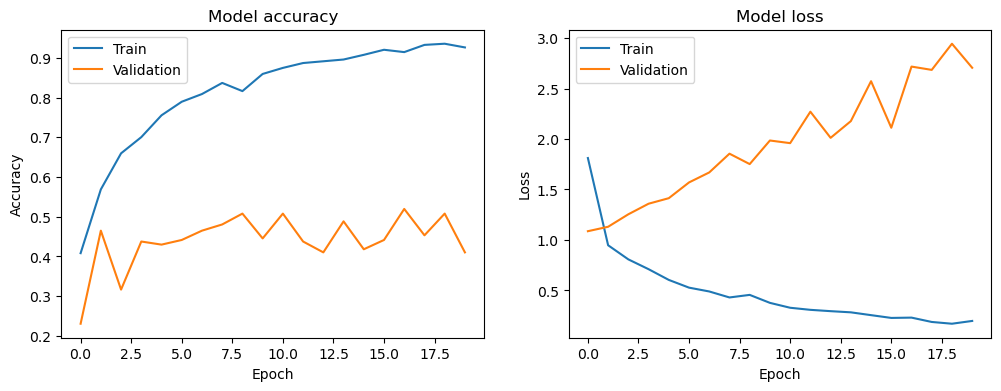

4/4 [==============================] - 1s 139ms/step - loss: 2.6747 - accuracy: 0.4219
Test accuracy: 0.421875


In [23]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel D.4</h2>
<p>Dropout 0.5</p>

In [29]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:20</p>
<p>veličina batcheva: 64</p>

In [26]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/20


2024-08-15 08:01:51.428897: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 16s 405ms/step - loss: 2.4343 - accuracy: 0.3802 - val_loss: 1.1822 - val_accuracy: 0.3164
Epoch 2/20
32/32 [==============================] - 12s 372ms/step - loss: 0.9511 - accuracy: 0.5344 - val_loss: 1.3767 - val_accuracy: 0.3789
Epoch 3/20
32/32 [==============================] - 12s 364ms/step - loss: 0.7957 - accuracy: 0.6523 - val_loss: 1.5459 - val_accuracy: 0.3047
Epoch 4/20
32/32 [==============================] - 12s 372ms/step - loss: 0.6899 - accuracy: 0.7087 - val_loss: 1.6685 - val_accuracy: 0.2734
Epoch 5/20
32/32 [==============================] - 13s 391ms/step - loss: 0.6202 - accuracy: 0.7426 - val_loss: 1.5606 - val_accuracy: 0.2852
Epoch 6/20
32/32 [==============================] - 12s 378ms/step - loss: 0.6263 - accuracy: 0.7436 - val_loss: 1.8234 - val_accuracy: 0.3672
Epoch 7/20
32/32 [==============================] - 12s 367ms/step - loss: 0.5365 - accuracy: 0.7741 - val_loss: 1.9615 - val_accuracy: 0.4180
Epoch 8/20

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela D.4:</p>

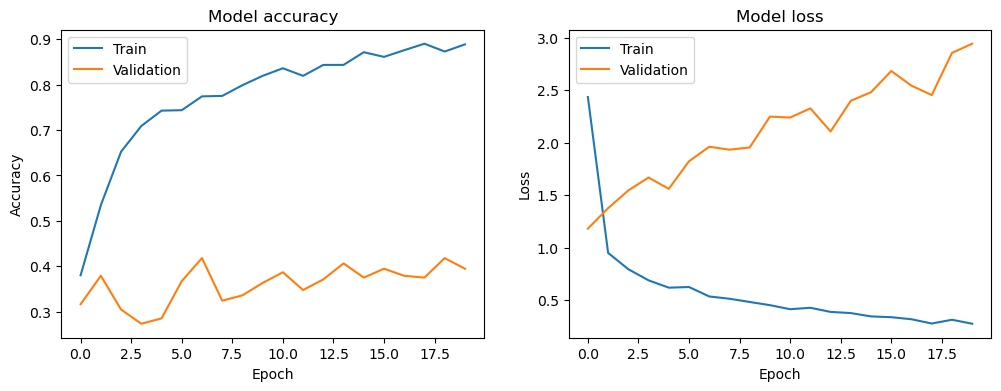

4/4 [==============================] - 1s 132ms/step - loss: 2.9054 - accuracy: 0.3711
Test accuracy: 0.37109375


In [27]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel D.5</h2>
<p>Dropout 0.5, 50 epoha</p>

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:50</p>
<p>veličina batcheva: 64</p>

In [30]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-15 08:09:44.871311: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 16s 395ms/step - loss: 1.7664 - accuracy: 0.4175 - val_loss: 1.1371 - val_accuracy: 0.2578
Epoch 2/50
32/32 [==============================] - 12s 373ms/step - loss: 0.7996 - accuracy: 0.6444 - val_loss: 1.2671 - val_accuracy: 0.3281
Epoch 3/50
32/32 [==============================] - 12s 363ms/step - loss: 0.6733 - accuracy: 0.7210 - val_loss: 1.4356 - val_accuracy: 0.2891
Epoch 4/50
32/32 [==============================] - 12s 372ms/step - loss: 0.6295 - accuracy: 0.7372 - val_loss: 1.3781 - val_accuracy: 0.3242
Epoch 5/50
32/32 [==============================] - 12s 382ms/step - loss: 0.5579 - accuracy: 0.7711 - val_loss: 1.4480 - val_accuracy: 0.3203
Epoch 6/50
32/32 [==============================] - 12s 376ms/step - loss: 0.5224 - accuracy: 0.7834 - val_loss: 1.5194 - val_accuracy: 0.3594
Epoch 7/50
32/32 [==============================] - 12s 368ms/step - loss: 0.4660 - accuracy: 0.8173 - val_loss: 1.5743 - val_accuracy: 0.3750
Epoch 8/50

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela D.5:</p>

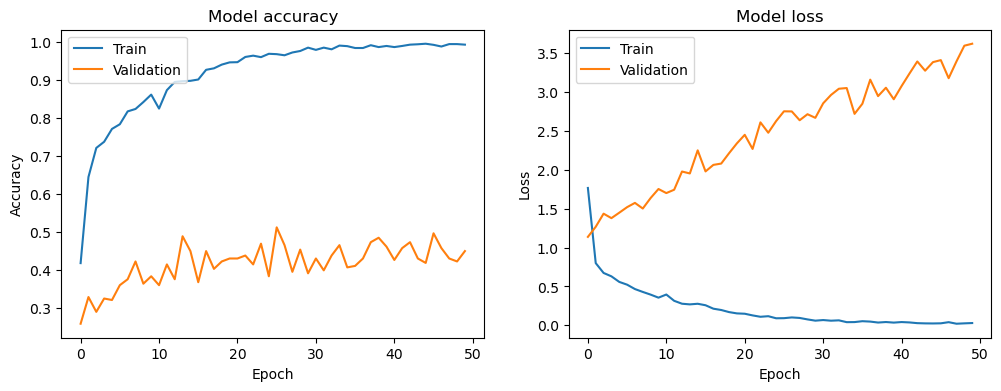

4/4 [==============================] - 1s 167ms/step - loss: 3.6550 - accuracy: 0.4297
Test accuracy: 0.4296875


In [31]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel D.6</h2>
<p>Dropout 0.5, 50 epoha, vraćanje conv slojeva smanjenih vrijednosti</p>

In [ ]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:50</p>
<p>veličina batcheva: 64</p>

In [34]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-15 08:25:28.346271: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_21/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 18s 331ms/step - loss: 1.9172 - accuracy: 0.3541 - val_loss: 1.1008 - val_accuracy: 0.3125
Epoch 2/50
32/32 [==============================] - 8s 246ms/step - loss: 1.0945 - accuracy: 0.3684 - val_loss: 1.1002 - val_accuracy: 0.2812
Epoch 3/50
32/32 [==============================] - 8s 246ms/step - loss: 1.0851 - accuracy: 0.4077 - val_loss: 1.1035 - val_accuracy: 0.2578
Epoch 4/50
32/32 [==============================] - 8s 246ms/step - loss: 1.0611 - accuracy: 0.4185 - val_loss: 1.1011 - val_accuracy: 0.3281
Epoch 5/50
32/32 [==============================] - 8s 247ms/step - loss: 1.0123 - accuracy: 0.4617 - val_loss: 1.1047 - val_accuracy: 0.4375
Epoch 6/50
32/32 [==============================] - 8s 247ms/step - loss: 0.9801 - accuracy: 0.5034 - val_loss: 1.0823 - val_accuracy: 0.4141
Epoch 7/50
32/32 [==============================] - 8s 246ms/step - loss: 0.9285 - accuracy: 0.5408 - val_loss: 1.1227 - val_accuracy: 0.3789
Epoch 8/50
32/32

<h3>Evaluacija modela D.6</h3>

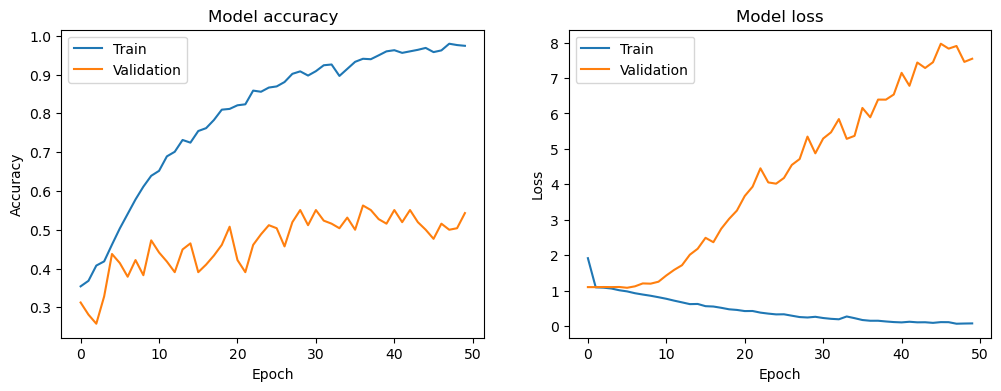

4/4 [==============================] - 1s 137ms/step - loss: 8.0541 - accuracy: 0.5234
Test accuracy: 0.5234375


In [35]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel D.7</h2>
<p>Dropout 0.5, 50 epoha, 2 conv slojeva smanjenih vrijednosti, dodan još jedan dropout (0.5)</p>

In [37]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 63, 63, 8)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 30, 30, 16)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:50</p>
<p>veličina batcheva: 64</p>

In [38]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50


2024-08-15 11:31:50.988912: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_24/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 14s 279ms/step - loss: 1.8445 - accuracy: 0.3414 - val_loss: 1.1012 - val_accuracy: 0.3398
Epoch 2/50
32/32 [==============================] - 8s 255ms/step - loss: 1.0899 - accuracy: 0.3492 - val_loss: 1.1176 - val_accuracy: 0.3438
Epoch 3/50
32/32 [==============================] - 8s 256ms/step - loss: 1.0696 - accuracy: 0.3767 - val_loss: 1.1904 - val_accuracy: 0.3633
Epoch 4/50
32/32 [==============================] - 8s 256ms/step - loss: 1.0478 - accuracy: 0.4381 - val_loss: 1.1993 - val_accuracy: 0.0938
Epoch 5/50
32/32 [==============================] - 8s 254ms/step - loss: 1.0242 - accuracy: 0.4470 - val_loss: 1.3306 - val_accuracy: 0.3516
Epoch 6/50
32/32 [==============================] - 8s 253ms/step - loss: 0.9938 - accuracy: 0.4676 - val_loss: 1.2597 - val_accuracy: 0.3516
Epoch 7/50
32/32 [==============================] - 8s 256ms/step - loss: 0.9379 - accuracy: 0.5452 - val_loss: 1.1936 - val_accuracy: 0.3672
Epoch 8/50
32/32

<h3>Evaluacija modela D.7</h3>

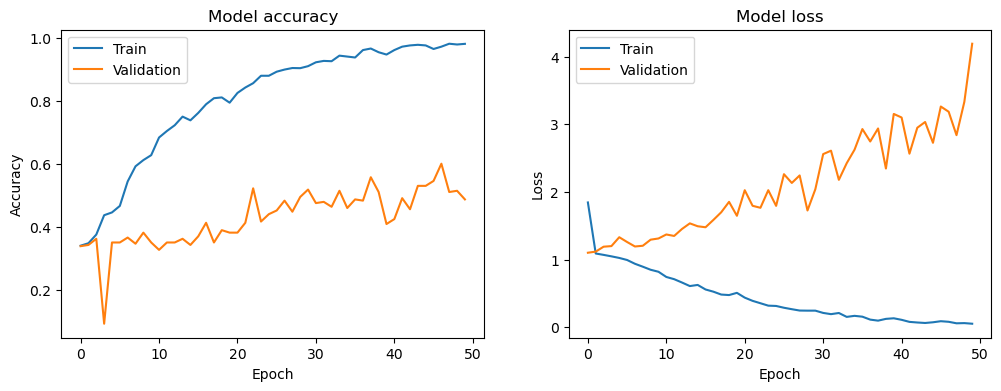

4/4 [==============================] - 1s 161ms/step - loss: 4.1195 - accuracy: 0.4727
Test accuracy: 0.47265625


In [39]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel D.8</h2>
<p>Jednak kao D.7 (Dropout 0.5, 50 epoha, 2 conv slojeva smanjenih vrijednosti, dodan još jedan dropout (0.5)), smanjen batch size na 32, povećan broj epoha na 100</p>

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:100</p>
<p>veličina batcheva: 32</p>

In [8]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 16)       

<p>Kompajliranje i treniranje modela:</p>
<p>broj epoha:100</p>
<p>veličina batcheva: 32</p>

In [12]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-15 14:46:52.419632: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


65/65 [==============================] - 15s 149ms/step - loss: 0.9761 - accuracy: 0.5024 - val_loss: 1.2575 - val_accuracy: 0.2222
Epoch 2/100
65/65 [==============================] - 9s 139ms/step - loss: 0.8466 - accuracy: 0.5991 - val_loss: 1.4833 - val_accuracy: 0.1007
Epoch 3/100
65/65 [==============================] - 9s 138ms/step - loss: 0.7447 - accuracy: 0.6625 - val_loss: 1.7489 - val_accuracy: 0.1354
Epoch 4/100
65/65 [==============================] - 9s 139ms/step - loss: 0.6695 - accuracy: 0.7142 - val_loss: 1.8614 - val_accuracy: 0.2604
Epoch 5/100
65/65 [==============================] - 9s 139ms/step - loss: 0.6150 - accuracy: 0.7249 - val_loss: 2.1705 - val_accuracy: 0.0556
Epoch 6/100
65/65 [==============================] - 9s 140ms/step - loss: 0.5756 - accuracy: 0.7597 - val_loss: 2.2820 - val_accuracy: 0.1354
Epoch 7/100
65/65 [==============================] - 9s 140ms/step - loss: 0.5008 - accuracy: 0.7819 - val_loss: 2.3810 - val_accuracy: 0.2951
Epoch 8/10

<h3>Evaluacija modela D.8</h3>

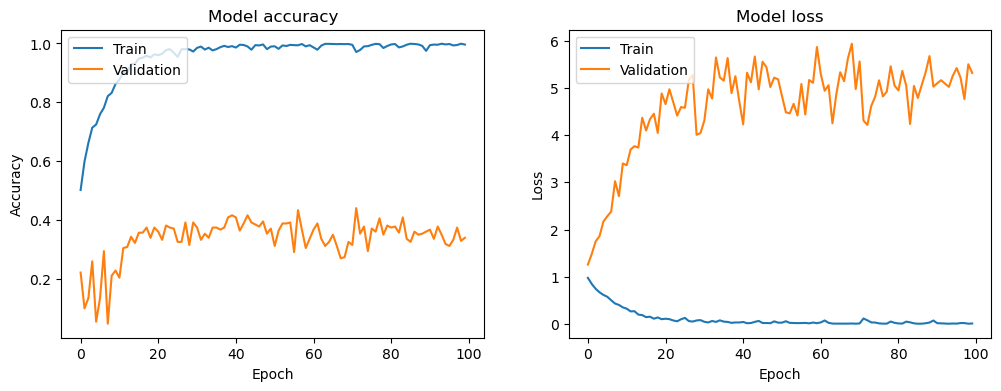

9/9 [==============================] - 1s 69ms/step - loss: 5.1690 - accuracy: 0.3542
Test accuracy: 0.3541666567325592


In [13]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2>Zaključak</h2>
<p>DOdavanje Dropouta utjecalo je na usporavanje učenja treningom</p>
<p>Mjenjanje kompleksnosti modela, sa 3 manja sloja dalo je bolje rezultate nego 1 malo kommpleksiniji sloj, uzevši u obzir da je broj <br/>
parametara u oba slučaja nešto iznad 3 000 000.</p>
<p>Smanjenje batch size a povećanje broja epoha nije poboljšalo rezultate nego ih je pogoršalo, pojačavajući overfit</p>
<p>KOraci za dalje:</p>
<p>Najbolji rezutlata imao je model D.7, na taj model primjeniti data augmentataion, probati i sa povećanjem batch size</p>